In [1]:
%matplotlib inline
import tensorflow as tf
from os.path import join
from matplotlib import pyplot as plt
import numpy as np
from scipy.misc import imread

In [2]:
base_dataset_dir = "./"
train_images_dir = join(base_dataset_dir, "images/")
train_annotations_dir = join(base_dataset_dir, "labels/")

In [3]:
image_name = "22678915_15"
crop_size = 256

In [4]:
def read_image_and_annotation(train_images_dir, train_annotations_dir, image_name):
    # read the input and annotation images
    image = imread(train_images_dir + image_name + ".png")
    annotation = imread(train_annotations_dir + image_name + ".png")
    assert (image.dtype) == "uint8"
    assert (annotation.dtype) == "uint8"
    return image, annotation

In [25]:
def random_crop(image_np, annotation_np, crop_size=128):
    """
    image_np: rgb image shape (H,W,3)
    annotation_np: 1D image shape (H,W,1)
    crop_size: integer
    """
    image_h = image_np.shape[0]
    image_w = image_np.shape[1]
    
    random_x = np.random.randint(0, image_w-crop_size+1) # Return random integers from low (inclusive) to high (exclusive).
    random_y = np.random.randint(0, image_h-crop_size+1) # Return random integers from low (inclusive) to high (exclusive).
    
    offset_x = random_x + crop_size
    offset_y = random_y + crop_size
    
    return image_np[random_x:offset_x, random_y:offset_y,:], annotation_np[random_x:offset_x, random_y:offset_y]

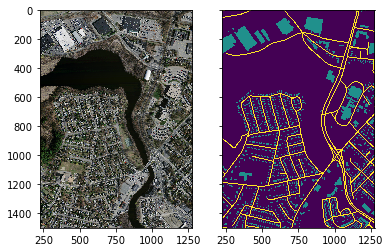

In [26]:
image_np, annotation_np = read_image_and_annotation(train_images_dir, train_annotations_dir, image_name)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(image_np)
ax2.imshow(np.squeeze(annotation_np))

In [29]:
cropped_image, cropped_annotation = random_crop(image_np, annotation_np, crop_size)

(256, 256, 3)
(256, 256)


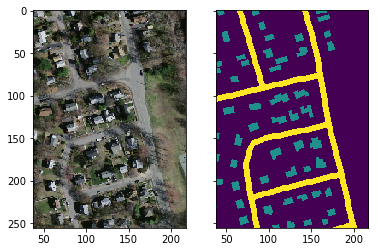

In [30]:
print(cropped_image.shape)
print(cropped_annotation.shape)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(cropped_image)
ax2.imshow(np.squeeze(cropped_annotation))

In [31]:
file = open("train.txt", 'r')
images_filenale_list = [line for line in file]

In [34]:
def next_batch(train_images_dir, train_annotations_dir, image_filenames_list, batch_size=5, crop_size=128):
    
    for image_name in image_filenames_list:
        
        image_np, annotation_np = read_image_and_annotation(train_images_dir, train_annotations_dir, image_name)
            
        batch_images = None
        batch_labels = None
        
        for batch_i in range(batch_size):
            cropped_image, cropped_annotation = random_crop(image_np, annotation_np, crop_size)
            cropped_image = np.expand_dims(cropped_image, axis=0)
            cropped_annotation = np.expand_dims(cropped_annotation, axis=0)
            
            if batch_images is None:
                batch_images = cropped_image
                batch_labels = cropped_annotation
            else:
                #print(batch_images.shape, cropped_image.shape)
                batch_images = np.concatenate((batch_images, cropped_image), axis=0)
                batch_labels = np.concatenate((batch_labels, cropped_annotation), axis=0)
    
        yield batch_images, batch_labels

In [70]:
batch_image, batch_annotations = next(next_batch(train_images_dir, train_annotations_dir, images_filenale_list, 50, crop_size))

In [71]:
print(batch_image.shape)
print(batch_annotations.shape)

(50, 256, 256, 3)
(50, 256, 256)


(256, 256, 3)
(256, 256)


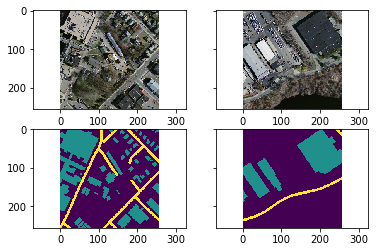

In [72]:
print(cropped_image.shape)
print(cropped_annotation.shape)
f, (ax1, ax2)= plt.subplots(2, 2, sharey=True)
ax1[0].imshow(batch_image[0])
ax2[0].imshow(np.squeeze(batch_annotations[0]), aspect=1)
ax1[1].imshow(batch_image[1])
ax2[1].imshow(np.squeeze(batch_annotations[1]), aspect=1)

In [7]:
seed = np.random.random_sample()
print(seed)

image_tensor, annotation_tensor = read_image_and_annotation(train_images_dir, train_annotations_dir, image_name, seed)

with tf.Session() as sess:
    image, annotation = sess.run([image_tensor, annotation_tensor])

0.9737081855137294
